In [1]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#! mamba install scipy=1.7.1-y
#! mamba install seaborn=0.9.0-y
#!  mamba install matplotlib=3.4.3-y
#!  mamba install statsmodels=0.12.0-y

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'


In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
# Task 4: Generate basic statistics and visualizations for upper management
# Findings about: 1) "For the '`Median value of owner-occupied homes´` provide a boxplot"

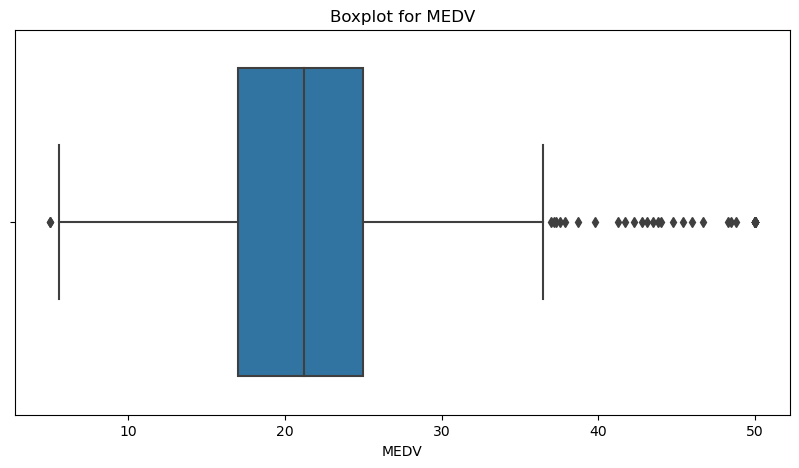

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

In [7]:
# EXPLANATION - The graph facilitates spoting the unusuals values. We're about evenly balanced, having more or less the same distance from the center line through the plot,So we may consider that the data is symetrical.

In [8]:
# Task 4 - Findings about: 2) "Provide a  bar plot for the Charles river variable"

Text(0.5, 1.0, 'Number of homes near the Charles River')

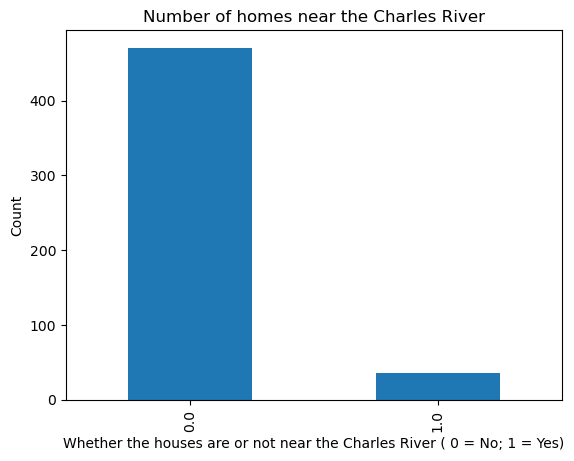

In [9]:
# plt.figure(figsize=(5,4))
# sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
# plt.bar(x=boston_df.CHAS,height=tips['tip'],data=tips)
# plt.title("Bar plot for Charles river")
# plt.show()
bar_plot = boston_df['CHAS'].value_counts().plot(kind='bar')
bar_plot.set_xlabel("Whether the houses are or not near the Charles River ( 0 = No; 1 = Yes)") 
bar_plot.set_ylabel("Count")
bar_plot.set_title("Number of homes near the Charles River")


In [10]:
# Explanation: The bar plot shows that the majority of the houses are not near the Charles River

In [11]:
# Task 4 - Findings about: 3) "Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)"

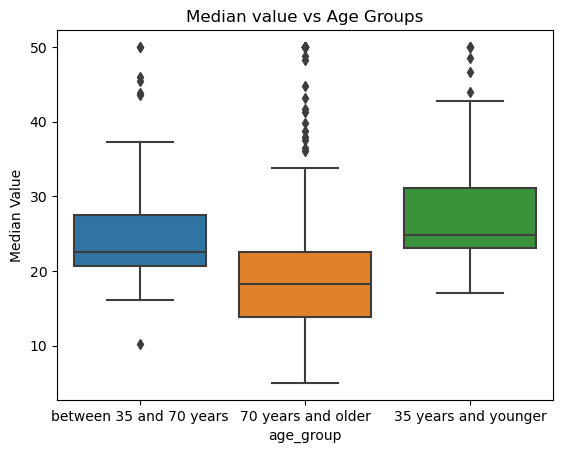

In [12]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value");

In [13]:
# Explanation: We can see that the median value is higher for the group of 35 and younger compared to other age groups.

In [14]:
# Task 4 - Findings about: 4) "Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?"

Text(0.5, 1.0, 'Relationship between NOX and INDUS')

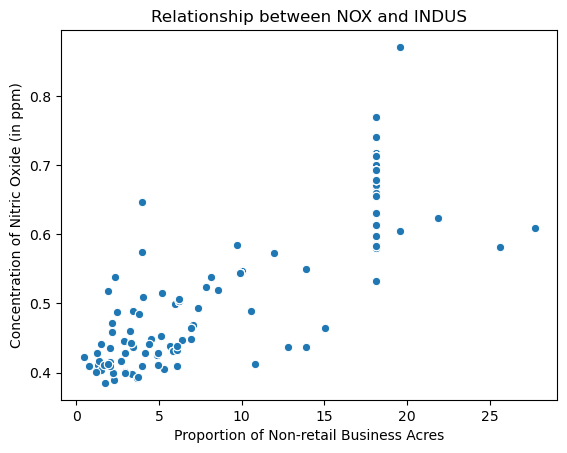

In [15]:
ax = sns.scatterplot(x ='INDUS', y='NOX', data=boston_df)
plt.ylabel("Concentration of Nitric Oxide (in ppm)")
plt.xlabel("Proportion of Non-retail Business Acres")
plt.title("Relationship between NOX and INDUS")

In [16]:
# Explanation: The ploz suggests about the possible nonlinearity of the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?"

In [17]:
# Task 4 - Findings about: 5) "Create a histogram for the pupil to teacher ratio variable"

[Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0, 0.5, 'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

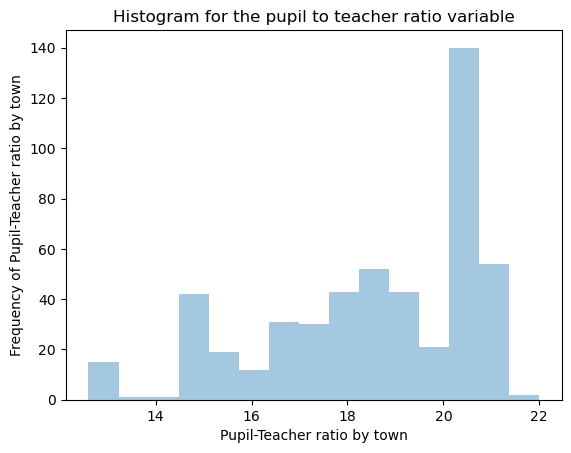

In [18]:
histogram = sns.distplot(boston_df.PTRATIO, kde=False, bins=15)
histogram.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

In [19]:
# Explanation: We can see that the data is negatively skewed, that means, the values are concentrated upper half and a dispersed lower half.

In [20]:
# Task 5 - Question 1
# Is there a significant difference in median value of houses bounded by the Charles river or not? 

# H0: medians of MEDV on each CHAS=1 and CHAS=0 are the same
# H1: medians of MEDV on each CHAS=1 and CHAS=0 are not the same

import scipy.stats
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [21]:
# Conclusion: Since the p-value is less than 0.05, we will reject the null hypothesis as there is NO significance difference in median value of houses bounded by Charles river and not

In [22]:
# Task 5 - Question 2
# Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

# H0: There is no difference in median values of houses for occupied units built prior to 1940.
# H1: There is a difference in median values of houses for occupied units built prior to 1940.

boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

scipy.stats.levene(boston_df[boston_df.age_span =='before 1940']['MEDV'],
                  boston_df[boston_df.age_span =='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964904, pvalue=0.2083265383143275)

In [23]:
# Conclusion: Since the p-value is greater than 0.05, we fail to reject the null hypothesis that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.

In [24]:
# Task 5 - Question 3
# Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

# H0: There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.
# H1: There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

In [25]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209189, 7.913361061211254e-98)

In [26]:
# Conclusion: Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [27]:
# Task 5 - Question 4
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

# H0: Weighted distances to five Boston employment centres are NOT related to median value
# H1: Weighted distances to five Boston employment centres are related to median value

In [28]:
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        17:49:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Conclusion: The coef DIS of 1.0916 indicates that an additional weighted distance to the five empolyment centers in boston increases of 1.0916 the median value of owner occupied homes